### IDs:
Insert yours IDs to the cell below

ID #1: 312332323

ID #2: 204780969


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [1]:
# p_at_least_one_defective = 1 - p_no_defective = 0.85
# p_no_defective = 1 - 0.85 = 0.15
# p_no_defective = (n choose n) * p^n * (1-p)^0 = p^n = 0.15

import math
p = 0.97
event_probability = 1 - 0.85
n = math.log(event_probability, p)

print(f'There should be {int(n)} independent samples')

There should be 62 independent samples


In [2]:
from scipy.stats import binom
def calc_independent_samples(bin_p, prob, k):
  n = k
  x_k_and_up = 0
  while x_k_and_up < prob:
    rv = binom(n, bin_p)
    x_k_and_up = 1 - rv.cdf(k - 1)
    n += 1
  return n - 1

n = calc_independent_samples(0.03,0.85, 1)
print(f'There should be {int(n)} independent samples')

There should be 63 independent samples


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [3]:
p = 0.96
event_probability = 1 - 0.95
n = math.log(event_probability, p)

print(f'There should be {int(n)} independent samples')

There should be 73 independent samples


In [4]:

n = calc_independent_samples(0.04,0.95, 1)
print(f'There should be {int(n)} independent samples')

There should be 74 independent samples


#### 1.C

Consider the following cases and calculate how many independent samples are required:

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [5]:
from scipy.stats import binom
def calc_independent_samples(bin_p, prob, k):
  n = k
  x_k_and_up = 0
  while x_k_and_up < prob:
    rv = binom(n, bin_p)
    x_k_and_up = 1 - rv.cdf(k - 1)
    n += 1
  return n - 1

num_of_samples_1 = calc_independent_samples(0.1, 0.9, 5)
num_of_samples_2 = calc_independent_samples(0.3, 0.9, 15)

print(f'1. There should be {num_of_samples_1} independent samples')
print(f'2. There should be {num_of_samples_2} independent samples')

1. There should be 78 independent samples
2. There should be 64 independent samples


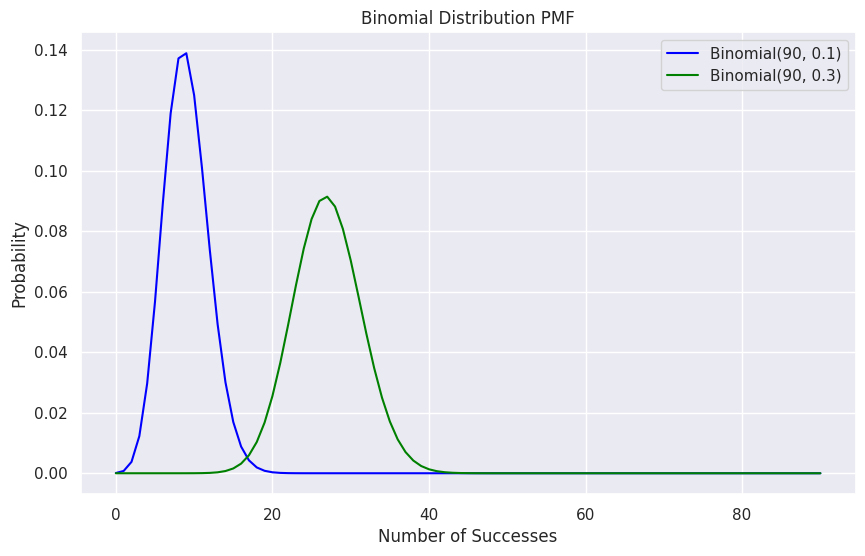

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
import seaborn as sns
sns.set(style="darkgrid")

n1 = 90
p1 = 0.1

n2 = 90
p2 = 0.3

x = np.arange(0, n1 + 1)

# Probability mass function for the first distribution
pmf1 = binom.pmf(x, n1, p1)

# Probability mass function for the second distribution
pmf2 = binom.pmf(x, n2, p2)

plt.figure(figsize=(10, 6))
plt.plot(x, pmf1, label=f'Binomial({n1}, {p1})', color='blue')
plt.plot(x, pmf2, label=f'Binomial({n2}, {p2})', color='green')

plt.title('Binomial Distribution PMF')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


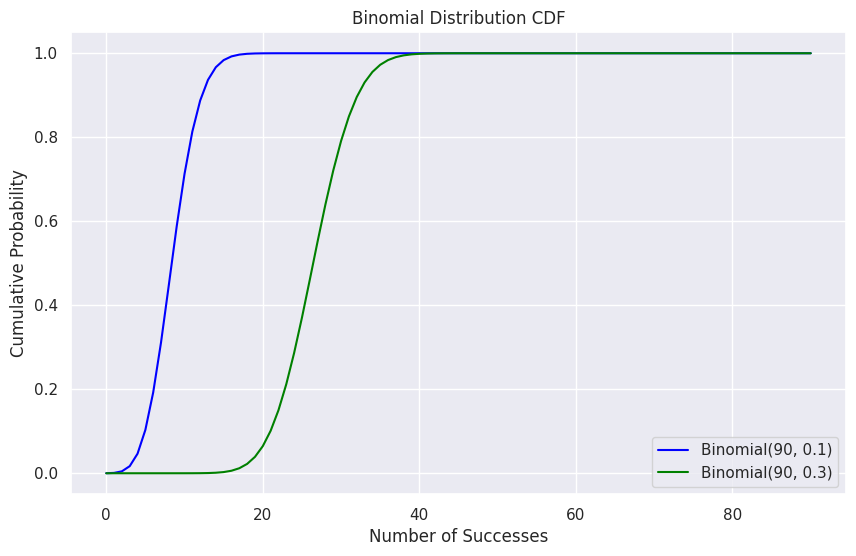

In [7]:
cdf1 = binom.cdf(x, n1, p1)

cdf2 = binom.cdf(x, n2, p2)

plt.figure(figsize=(10, 6))
plt.plot(x, cdf1, label=f'Binomial({n1}, {p1})', color='blue')
plt.plot(x, cdf2, label=f'Binomial({n2}, {p2})', color='green')

plt.title('Binomial Distribution CDF')
plt.xlabel('Number of Successes')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()


In case 1 we have defective rate $p$ and we look for the minimal number of trials to get more than x successes covering 90% of the right-tail of the distribution. In case 2 we have defective rate $3p$ and we look for the minimal number of trials to get more than 3x successes covering 90% of the right-tail of the distribution. Since both of the success rates are less than 0.5, the variance of the distribution in case 2 is greater than the variance in case 1. As a result, In Case 2, the higher probability of a defective product influences the shape of the distribution, making it more spread out. The higher defect rate in Case 2 results in a faster accumulation of defective products, requiring fewer samples to achieve the desired probability of at least 15 defective products. This result is reasonable since higher success rates lead to distributions that reach the desired probabilities with fewer samples due to a higher likelihood of observing defective products.



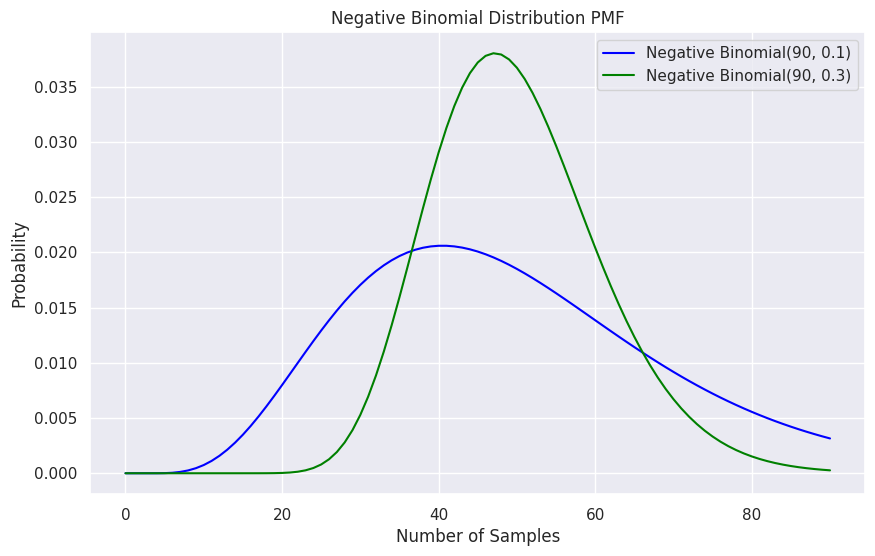

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom,nbinom
import seaborn as sns
sns.set(style="darkgrid")

n1 = 90
p1 = 0.1

n2 = 90
p2 = 0.3

x = nbinom(5,0.1,loc=5)
y = nbinom(15,0.3,loc=15)

i = np.arange(0, n1 + 1)

pmf1 = x.pmf(i)
pmf2 = y.pmf(i)

plt.figure(figsize=(10, 6))
plt.plot(i, pmf1, label=f'Negative Binomial({n1}, {p1})', color='blue')
plt.plot(i, pmf2, label=f'Negative Binomial({n2}, {p2})', color='green')

plt.title('Negative Binomial Distribution PMF')
plt.xlabel('Number of Samples')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


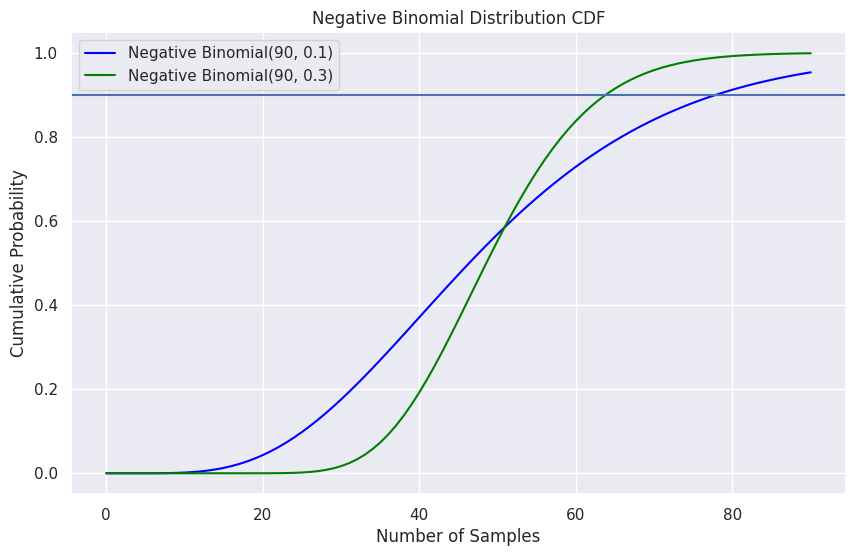

In [9]:

cdf1 = x.cdf(i)

cdf2 = y.cdf(i)

plt.figure(figsize=(10, 6))
plt.plot(i, cdf1, label=f'Negative Binomial({n1}, {p1})', color='blue')
plt.plot(i, cdf2, label=f'Negative Binomial({n2}, {p2})', color='green')

plt.title('Negative Binomial Distribution CDF')
plt.xlabel('Number of Samples')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.axhline(0.9);
plt.grid(True)
plt.show()

The distribution is Negative Binomial, since we are looking for the number of trials until the n success. a "success" will be a defective product in the batch.

In case 1 we have defective rate p and we look for the minimal number of trials to get more than x successes covering 90% of the distribution. In case 2 we have defective rate 3p and we look for the minimal number of trials to get more than 3x successes covering 90% of the distribution. Since both of the success rates are less than 0.5, the variance of the distribution in case 2 = 450 and is greater than the variance in case 1 = 116.666... the mean in the 2 cases are the same = 50.
As a result, In Case 1, the lower probability of a defective product influences the shape of the distribution, making it less spread out. The higher defect rate in Case 2 results in a faster accumulation of defective products, requiring fewer samples to achieve the desired probability of at least 15 defective products. This result is reasonable since higher success rates lead to distributions that reach the desired probabilities with fewer samples due to a higher likelihood of observing defective products.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br>

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.
Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

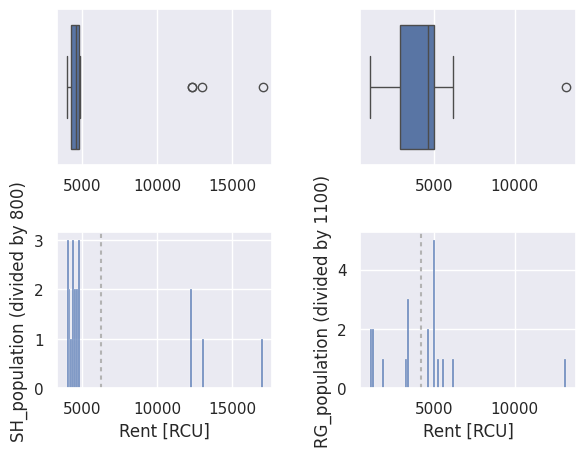

SH population: 16000
Median: 4600.0
Mean: 6300.0
iqr: 550.0

RG population: 22000
Median: 4600.0
Mean: 4200.0
iqr: 2150.0

Have at least 10 non zero bins: SH = 12 RG = 11
The IQR of the rent is smaller in SH than in RG: 550.0 < 2150.0 = True


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy import stats


SH_population = 16000
RG_population = 22000
SH_mean_rent_in_RCU = 6300
RG_mean_rent_in_RCU = 4200
median_in_RCU = 4600
n_bins = 100

SH_dist = np.array([4000,4000,4100,4200,4200,4300,4500,4500,4500,4600,4600,4700,4700,4800,4800,4900,12300,12300,17000,13000])
RG_dist = np.array([1200,1200,1800,1000,3200,3400,3400,3400,1000,4600,4600,5000,5000,5000,5000,5000,5200,5600,6200,13200])

f, (ax_box, ax_hist) = plt.subplots(2,2)
f.tight_layout(pad=2.0)

sns.boxplot(SH_dist, orient="h", ax=ax_box[0])
sns.histplot(data=SH_dist, ax=ax_hist[0], bins=n_bins)
sns.boxplot(RG_dist, orient="h", ax=ax_box[1])
sns.histplot(data=RG_dist, ax=ax_hist[1], bins=n_bins)

ax_box[0].set(xlabel="")
ax_box[1].set(xlabel="")

ax_hist[0].axvline(SH_mean_rent_in_RCU, color=".7", dashes=(2, 2))
ax_hist[1].axvline(RG_mean_rent_in_RCU, color=".7", dashes=(2, 2))

ax_hist[0].set(xlabel="Rent [RCU]",ylabel="SH_population (divided by 800)")
ax_hist[1].set(xlabel="Rent [RCU]",ylabel="RG_population (divided by 1100)")
plt.show()

print(f'SH population: {len(SH_dist)*800}\n'
f'Median: {np.median(SH_dist)}\n'
f'Mean: {SH_dist.mean()}\n'
f'iqr: {stats.iqr(SH_dist)}\n')

print(f'RG population: {len(RG_dist)*1100}\n'
f'Median: {np.median(RG_dist)}\n'
f'Mean: {RG_dist.mean()}\n'
f'iqr: {stats.iqr(RG_dist)}\n')

print(f'Have at least 10 non zero bins: SH = {len(np.unique(SH_dist/n_bins))} RG = {len(np.unique(RG_dist/n_bins))}')
print(f'The IQR of the rent is smaller in SH than in RG: {stats.iqr(SH_dist)} < {stats.iqr(RG_dist)} = {stats.iqr(SH_dist) < stats.iqr(RG_dist)}')

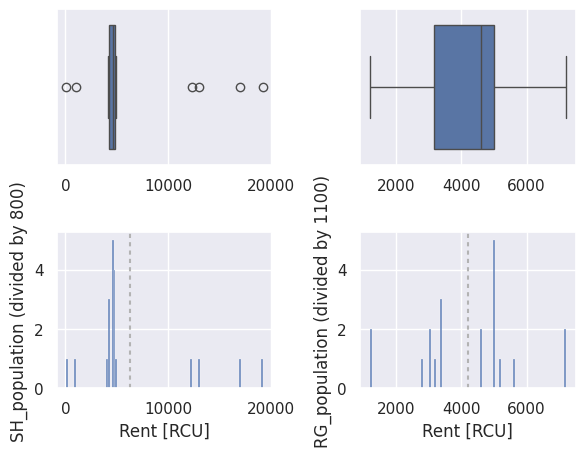

SH population: 16000
Median: 4600.0
Mean: 6300.0
iqr: 550.0

RG population: 22000
Median: 4600.0
Mean: 4200.0
iqr: 1850.0

Have at least 10 non zero bins: SH = 14 RG = 10
The IQR of the rent is smaller in SH than in RG: 550.0 < 1850.0 = True


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy import stats

sns.set(style="darkgrid")

SH_population = 16000
RG_population = 22000
SH_mean_rent_in_RCU = 6300
RG_mean_rent_in_RCU = 4200
median_in_RCU = 4600
n_bins = 100

SH_dist = np.array([100,1000,4100,4200,4200,4300,4500,4500,4500,4600,4600,4700,4700,4800,4800,4900,19200,12300,17000,13000])
RG_dist = np.array([1200,1200,2800,3000,3200,3400,3400,3400,3000,4600,4600,5000,5000,5000,5000,5000,5200,5600,7200,7200])

f, (ax_box, ax_hist) = plt.subplots(2,2)
f.tight_layout(pad=2.0)

sns.boxplot(SH_dist, orient="h", ax=ax_box[0])
sns.histplot(data=SH_dist, ax=ax_hist[0], bins=n_bins)
sns.boxplot(RG_dist, orient="h", ax=ax_box[1])
sns.histplot(data=RG_dist, ax=ax_hist[1], bins=n_bins)

ax_box[0].set(xlabel="")
ax_box[1].set(xlabel="")

ax_hist[0].axvline(SH_mean_rent_in_RCU, color=".7", dashes=(2, 2))
ax_hist[1].axvline(RG_mean_rent_in_RCU, color=".7", dashes=(2, 2))

ax_hist[0].set(xlabel="Rent [RCU]",ylabel="SH_population (divided by 800)")
ax_hist[1].set(xlabel="Rent [RCU]",ylabel="RG_population (divided by 1100)")
plt.show()

print(f'SH population: {len(SH_dist)*800}\n'
f'Median: {np.median(SH_dist)}\n'
f'Mean: {SH_dist.mean()}\n'
f'iqr: {stats.iqr(SH_dist)}\n')

print(f'RG population: {len(RG_dist)*1100}\n'
f'Median: {np.median(RG_dist)}\n'
f'Mean: {RG_dist.mean()}\n'
f'iqr: {stats.iqr(RG_dist)}\n')

print(f'Have at least 10 non zero bins: SH = {len(np.unique(SH_dist/n_bins))} RG = {len(np.unique(RG_dist/n_bins))}')
print(f'The IQR of the rent is smaller in SH than in RG: {stats.iqr(SH_dist)} < {stats.iqr(RG_dist)} = {stats.iqr(SH_dist) < stats.iqr(RG_dist)}')

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

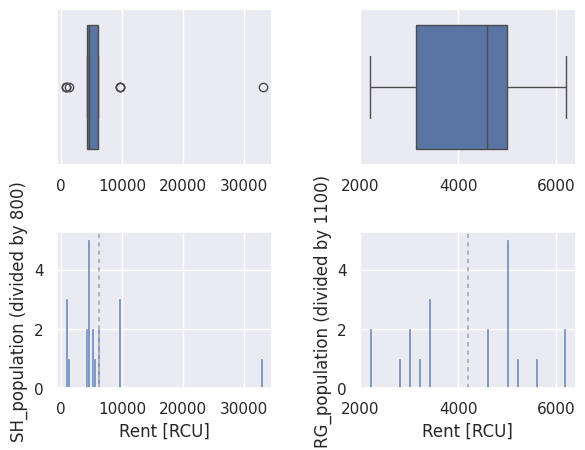

SH population: 16000
Median: 4600.0
Mean: 6300.0
iqr: 1800.0
var: 44282000.0

RG population: 22000
Median: 4600.0
Mean: 4200.0
iqr: 1850.0
var: 1512000.0

Have at least 10 non zero bins: SH = 10 RG = 10
The IQR of the rent is smaller in SH than in RG: 1800.0 < 1850.0 = True
Is rent in SH have a higher variance than the rent in RG: 44282000.0 > 1512000.0 = True


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy import stats

sns.set(style="darkgrid")

SH_population = 16000
RG_population = 22000
SH_mean_rent_in_RCU = 6300
RG_mean_rent_in_RCU = 4200
median_in_RCU = 4600
n_bins = 100

SH_dist = np.array([1300,900,900,900,4500,4500,4300,4300,4600,4600,4600,5300,5300,5700,6100,6100,9700,9700,9700,33000])
RG_dist = np.array([2800,2200,2200,3200,3000,3400,3400,3400,3000,4600,4600,5000,5000,5000,5000,5000,5600,6200,6200,5200])

f, (ax_box, ax_hist) = plt.subplots(2,2)
f.tight_layout(pad=2.0)

sns.boxplot(SH_dist, orient="h", ax=ax_box[0])
sns.histplot(data=SH_dist, ax=ax_hist[0], bins=n_bins)
sns.boxplot(RG_dist, orient="h", ax=ax_box[1])
sns.histplot(data=RG_dist, ax=ax_hist[1], bins=n_bins)

ax_box[0].set(xlabel="")
ax_box[1].set(xlabel="")

ax_hist[0].axvline(SH_mean_rent_in_RCU, color=".7", dashes=(2, 2))
ax_hist[1].axvline(RG_mean_rent_in_RCU, color=".7", dashes=(2, 2))

ax_hist[0].set(xlabel="Rent [RCU]",ylabel="SH_population (divided by 800)")
ax_hist[1].set(xlabel="Rent [RCU]",ylabel="RG_population (divided by 1100)")
plt.show()

print(f'SH population: {len(SH_dist)*800}\n'
f'Median: {np.median(SH_dist)}\n'
f'Mean: {SH_dist.mean()}\n'
f'iqr: {stats.iqr(SH_dist)}\n'
f'var: {SH_dist.var()}\n')

print(f'RG population: {len(RG_dist)*1100}\n'
f'Median: {np.median(RG_dist)}\n'
f'Mean: {RG_dist.mean()}\n'
f'iqr: {stats.iqr(RG_dist)}\n'
f'var: {RG_dist.var()}\n')

print(f'Have at least 10 non zero bins: SH = {len(np.unique(SH_dist/n_bins))} RG = {len(np.unique(RG_dist/n_bins))}')
print(f'The IQR of the rent is smaller in SH than in RG: {stats.iqr(SH_dist)} < {stats.iqr(RG_dist)} = {stats.iqr(SH_dist) < stats.iqr(RG_dist)}')
print(f'Is rent in SH have a higher variance than the rent in RG: {SH_dist.var()} > {RG_dist.var()} = {SH_dist.var() > RG_dist.var()}')

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that $X$ is a vector of counts.


2. Consider the random variable $Y = X_2 + X_3 + X_4$.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to results from class and explain your observation.

In [13]:
from scipy.stats import multinomial, moment
K = 100
p_multinomial = [0.2, 0.1, 0.1, 0.1, 0.2, 0.3]
n_multinomial = 20
x_results = multinomial.rvs(n_multinomial, p_multinomial, size=K, random_state=42)
Y = x_results[:, 1] + x_results[:, 2] + x_results[:, 3]
empirical_centralized_third_moment = moment(Y, 3)
print(f'empirical_centralized_third_moment: {empirical_centralized_third_moment}')

empirical_centralized_third_moment: -0.5399999999999961


Explanation:

As we learned in the class, the random variable $Y = X_2 + X_3 + X_4$ is Binomial with $p = p_2 + p_3 + p_4 = 0.3$ (we can think of it as unifying the 3 sides of the dice, and the random variable with the success probability p refers to a success on each one of the 3 sides).
Therefore, we can directly calculate the third moment of the random variable $Y$ and use the formula we learned in the class:

$
E[(Y - E(Y))^3] = np(1-p)(1-2p) = 20 * 0.3 * 0.7 * 0.4 = 1.68
$

The theoretical results are different from the empirical results. A reasonable explanation to the difference would be the small number of experiments k=100. However, as we increase k (the number of experiments) we expect to get closer results to the theoretical value (1.68).  
We can see the convergence in the following plot:

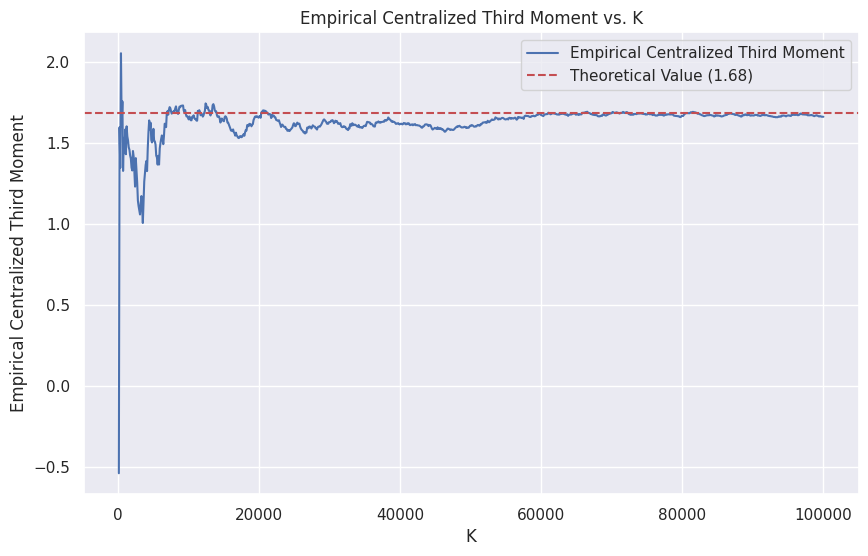

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def compute_moment(k):
  x_results = multinomial.rvs(n_multinomial, p_multinomial, size=k, random_state=42)
  Y = x_results[:, 1] + x_results[:, 2] + x_results[:, 3]
  return moment(Y, 3)

# Range of K values
K_values = np.arange(100, 100001, 100)

# Compute empirical centralized third moment for each K
moments = [compute_moment(K) for K in K_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, moments, label='Empirical Centralized Third Moment')
plt.axhline(y=1.68, color='r', linestyle='--', label='Theoretical Value (1.68)')
plt.xlabel('K')
plt.ylabel('Empirical Centralized Third Moment')
plt.title('Empirical Centralized Third Moment vs. K')
plt.legend()
plt.grid(True)
plt.show()


### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [15]:
def NFoldConv(P, n):
  Q = {0: 1.0}

  # Applying convolution n times
  for _ in range(n):
    cur_conv_result = {}

    for p_val, p_prob in P.items():
      for q_val, q_prob in Q.items():
        sum_values = p_val + q_val
        mul_probs = p_prob * q_prob
        cur_conv_result[sum_values] = cur_conv_result.get(sum_values, 0) + mul_probs

    Q = cur_conv_result

  return Q

#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 independent times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [16]:
P = {i: 1/8 for i in range(1, 9)}
results = NFoldConv(P, 17)
for key in results.keys():
    print(key, ":", results[key])

17 : 4.440892098500626e-16
18 : 7.549516567451064e-15
19 : 6.794564910705958e-14
20 : 4.303224443447107e-13
21 : 2.1516122217235534e-12
22 : 9.036771331238924e-12
23 : 3.313482821454272e-11
24 : 1.088715784192118e-10
25 : 3.2660718574106795e-10
26 : 9.07134811711785e-10
27 : 2.3577291230481023e-09
28 : 5.782673007104222e-09
29 : 1.3473395732432891e-08
30 : 2.998400727705075e-08
31 : 6.401734875538523e-08
32 : 1.3161584089260714e-07
33 : 2.613809253482202e-07
34 : 5.027422242953605e-07
35 : 9.38663699212583e-07
36 : 1.7045993589981379e-06
37 : 3.015970226893927e-06
38 : 5.206881849684208e-06
39 : 8.783168114145923e-06
40 : 1.449303744882613e-05
41 : 2.3418493098503745e-05
42 : 3.7090165106334894e-05
43 : 5.762708941681183e-05
44 : 8.790117605705916e-05
45 : 0.00013172354057466862
46 : 0.0001940465160554794
47 : 0.000281171099826949
48 : 0.00040094502474907756
49 : 0.0005629319236253316
50 : 0.0007785276598544222
51 : 0.0010609964316725673
52 : 0.0014253974040241424
53 : 0.00188837307845

### Question 5 - Counting Similar Strings

Define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly tossing a $p$-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 5.A
Plot the distribution of $W$ for $n = 100$ and $p = 0.3$. What is the name of this distribution?

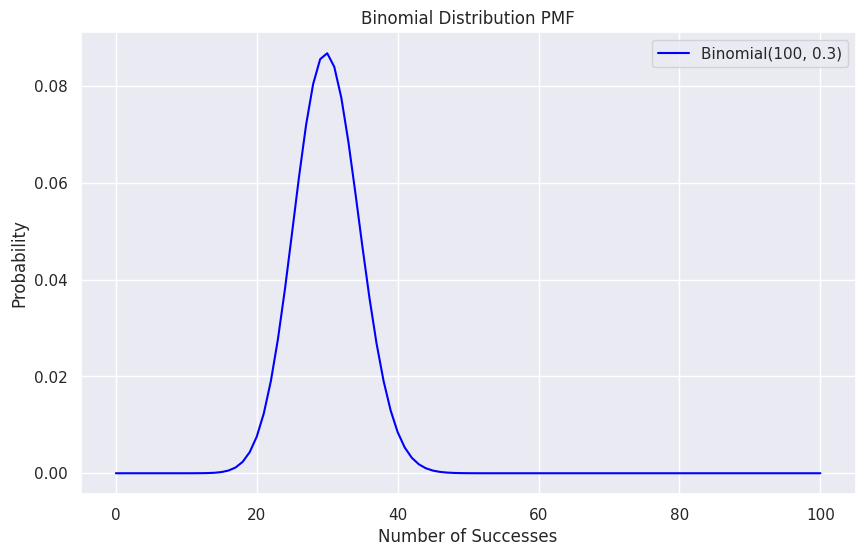

In [17]:
# This is a binomial distribution with p=0.3 and n=100

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

n = 100
p = 0.3

x = np.arange(0, n + 1)
pmf = binom.pmf(x, n, p)

plt.figure(figsize=(10, 6))
plt.plot(x, pmf, label=f'Binomial({n}, {p})', color='blue')

plt.title('Binomial Distribution PMF')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

#### 5.B
State a formula for computing $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

$C$ is the number of sets $\omega^* \in \Omega$ such that the number of $1$s in $\omega^*$ will be equal to the number of $1$s in $\omega$. The number of $k$ $1$s out of $n$ is $n \choose k$. Therefore, $C(\omega) = k$ if ${n \choose i} = k$

$
P(C_{p, n} = k) =  P(C(\omega) = k ) = P(W(\omega) = i | {n \choose i} = k) = {n \choose i} p^i (1-p)^{n-i} = kp^i (1-p)^{n-i}
$

Note that the values of k depend on the expression ${n \choose i}$, where i ranges between 0 to n. Therefore, in order to calculate the expected value of C we can sum over following formula:

$
E(C) = \sum k P(C=k) = \sum_{i}{n \choose i} P (C = {n \choose i} ) = \sum_{i}{n \choose i} P (W(\omega) = i) = \sum_{i}{n \choose i} {n \choose i} p^i (1-p)^{n-i} = \sum_{i}{n \choose i}^2 p^i (1-p)^{n-i}
$

In [18]:
import numpy as np
from math import comb

def c_exptected_value(p, n):
  return np.sum([(comb(n, k) ** 2) * (p**k) * ((1-p)**(n-k)) for k in range(n + 1)])

ps = [0.1, 0.5, 0.8]
ns = [10, 20, 50, 100]

for p in ps:
  for n in ns:
    print(f'for p = {p}, n = {n}, E(C) = {c_exptected_value(p, n)}')

for p = 0.1, n = 10, E(C) = 22.575959534800006
for p = 0.1, n = 20, E(C) = 1757.7458477658747
for p = 0.1, n = 50, E(C) = 1479309659.7732306
for p = 0.1, n = 100, E(C) = 1.6815694309212353e+19
for p = 0.5, n = 10, E(C) = 180.42578125
for p = 0.5, n = 20, E(C) = 131460.69414138794
for p = 0.5, n = 50, E(C) = 89609514959900.06
for p = 0.5, n = 100, E(C) = 7.143018323803169e+28
for p = 0.8, n = 10, E(C) = 66.95000811519996
for p = 0.8, n = 20, E(C) = 16979.43212422518
for p = 0.8, n = 50, E(C) = 490151964857.8016
for p = 0.8, n = 100, E(C) = 2.0130081915278985e+24


#### 5.C
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. <br>
Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). <br>
In every histogram indicate the values of $n$ and $p$.

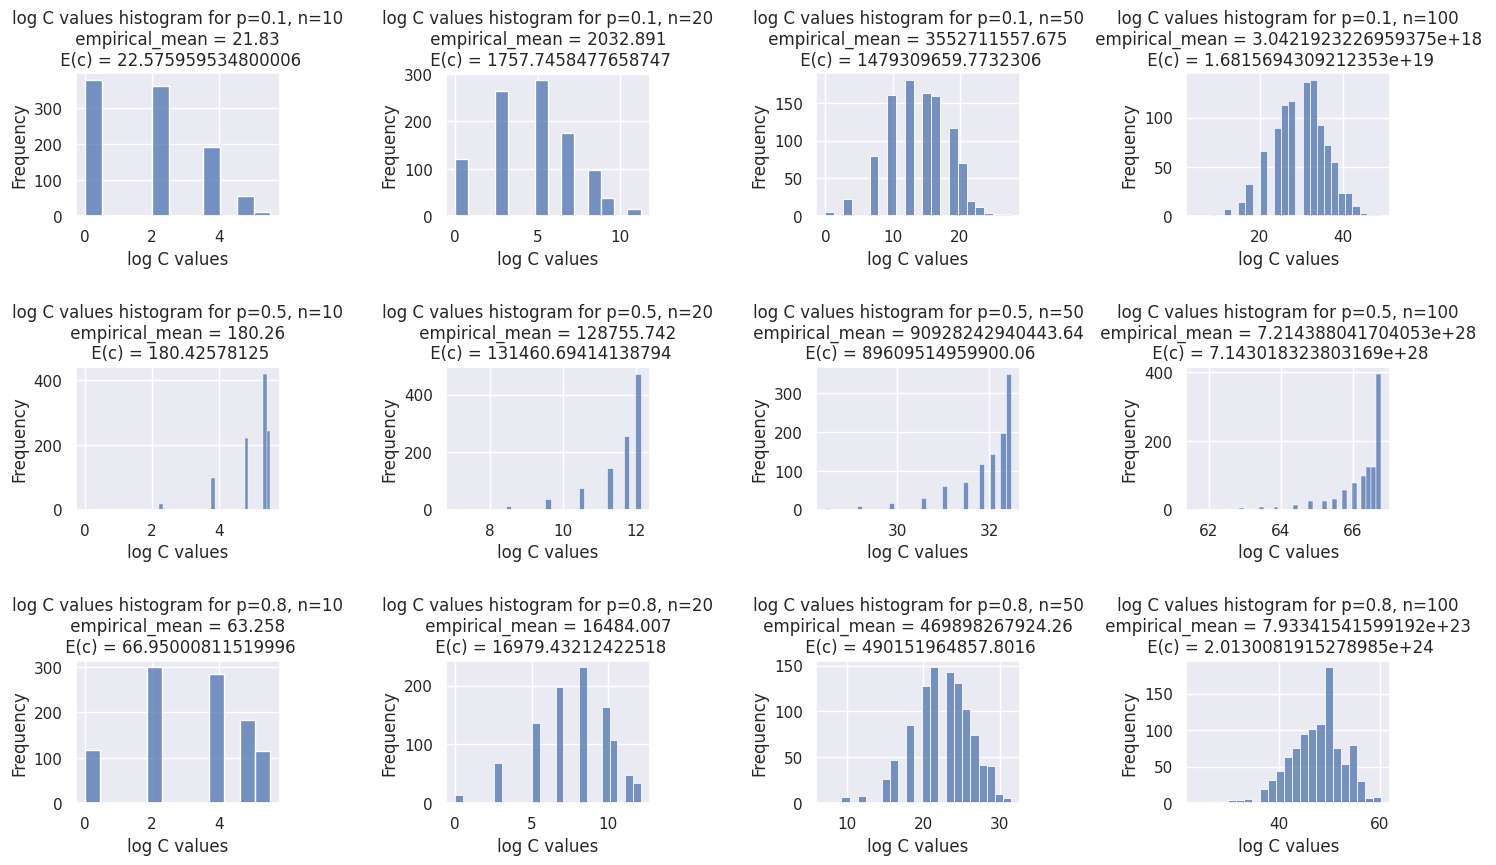

In [19]:
import matplotlib.pyplot as plt
empirical_values = []
expected_values = []
n_samples = 1000


f,(hist) = plt.subplots(len(ps),len(ns),figsize=(14,8))
f.tight_layout(w_pad=7,h_pad=7)

for idp,p in enumerate(ps):
  for idn,n in enumerate(ns):
    w = np.random.binomial(n, p, n_samples)
    c_values = [comb(n, sample) for sample in w]
    c_values = np.array(c_values, dtype=float)
    c_empirical_mean = np.mean(c_values)
    c_expected_val = c_exptected_value(p, n)
    empirical_values.append(c_empirical_mean)
    expected_values.append(c_expected_val)
    sns.histplot(data=np.log(c_values), ax=hist[idp][idn], bins='auto')
    hist[idp][idn].set(xlabel="log C values",ylabel="Frequency",title=f'log C values histogram for p={p}, n={n}\n empirical_mean = {c_empirical_mean} \n E(c) = {c_expected_val}' )

plt.show()


#### 5.D
Use a scatter plot to compare the empirical and the computed values from the previous section.

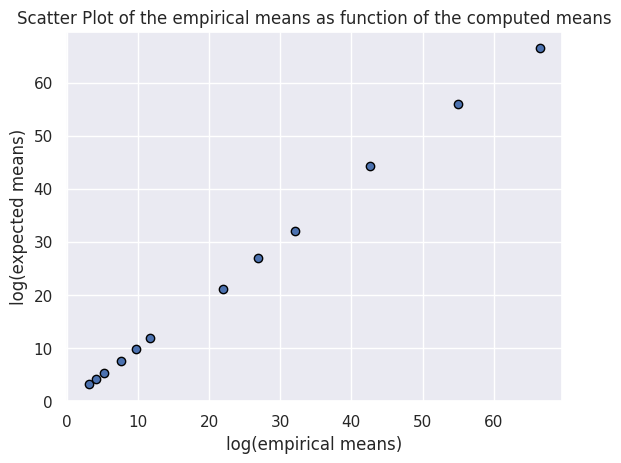

In [20]:
plt.scatter(np.log(empirical_values), np.log(expected_values), edgecolor='black')
plt.title('Scatter Plot of the empirical means as function of the computed means')
plt.xlabel('log(empirical means)')
plt.ylabel('log(expected means)')
plt.show()


### Question 6 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 6.A
Write code to compute the exact value of $E(T_{N})$

In [21]:
H = lambda n: np.sum([1 / i for i in range(1, n + 1)])

def e_tn(n):
  return n * H(n)

#### 6.B
Write code to compute the exact value of $V(T_{N})$

In [22]:
def v_tn(n):
  return n**2 * (np.sum([1 / (i**2) for i in range(1, n + 1)])) - n*H(n)

#### 6.C
Write code to exactly compute $P(T_{30}>60)$

In [23]:
import numpy as np
from scipy.stats import geom


def p_tn_eq_k(n, k, total_n, cache):
  if k < n:
    return 0

  if n == 1:
    if k == 1:
      return 1
    else:
      return 0

  if (n, k) in cache:
    return cache[(n, k)]


  p = (total_n-n+1) / total_n
  sums = 0
  for i in range(1, k):
    g = ((1-p)**(i-1)) * p

    sums += g * p_tn_eq_k(n-1, k-i, total_n, cache)

  cache[(n, k)] = sums
  return sums

s = [p_tn_eq_k(30, i, 30, {}) for i in range(61)]
print(1 - sum(s))

0.9940158432042814


#### 6.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Compute $E(S_{60})$ - the expected value of the time it will take to observe $N/2=60/2=30$ from the total of $N=60$ coupon types

$E(S_{60}) = E(X_1 + ... + X_{30}) = \sum_{i=1}^{30}E(X_i)$

$E(X_i) = \frac{1}{p_i} = \frac{60}{60 - i + 1}$

In [24]:
e_s_60 = np.sum([60 / (60-i+1) for i in range(1, 31)])
print(e_s_60)

41.09299692188081


#### 6.E
Write code to exactly compute $P(S_{60}>60)$

In [25]:
s = [p_tn_eq_k(30, i, 60, {}) for i in range(61)]
print(1 - sum(s))

0.00017216506473560766
